In [401]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


In [402]:
df = pd.read_csv('books.csv')
df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
4,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...


In [403]:
missing_values = pd.DataFrame(df.isnull().sum(), columns=['Missing Values'])
missing_values

,Missing Values
book_id,0
goodreads_book_id,0
best_book_id,0
work_id,0
books_count,0
isbn,52
isbn13,44
authors,0
original_publication_year,3
original_title,52


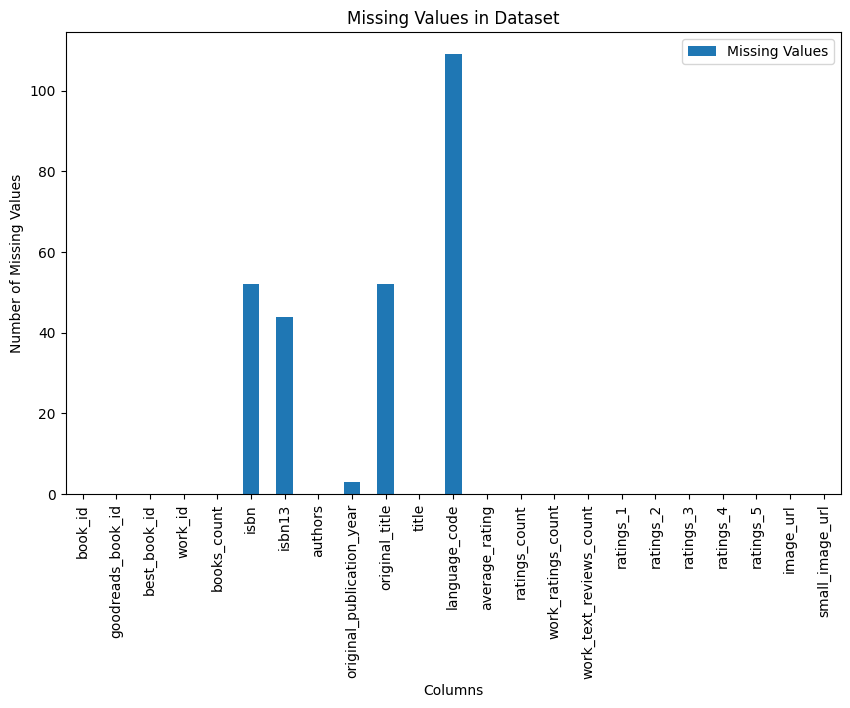

In [404]:
missing_values.plot.bar(figsize=(10, 6))
plt.title('Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

In [405]:

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


imputer_numeric = SimpleImputer(strategy='mean')
df[num_cols] = imputer_numeric.fit_transform(df[num_cols])


imputer_categorical = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_categorical.fit_transform(df[categorical_cols])


print("Missing Values After Imputation:")
print(df.isnull().sum().to_string())

Missing Values After Imputation:
book_id                      0
goodreads_book_id            0
best_book_id                 0
work_id                      0
books_count                  0
isbn                         0
isbn13                       0
authors                      0
original_publication_year    0
original_title               0
title                        0
language_code                0
average_rating               0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
image_url                    0
small_image_url              0


In [406]:
duplicates = df.duplicated().sum()
duplicates

0

In [407]:
descriptive_stats = df[num_cols].describe()
descriptive_stats

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,1354.000000,1.354000e+03,1.354000e+03,1.354000e+03,1354.000000,1.354000e+03,1354.000000,1354.000000,1.354000e+03,1.354000e+03,1354.000000,1354.000000,1354.000000,1354.000000,1.354000e+03,1.354000e+03
mean,4453.584195,5.951852e+06,6.120589e+06,8.707028e+06,50.330871,9.766700e+12,2003.422650,3.999357,9.160429e+04,9.915569e+04,5151.093058,2297.409158,5005.615953,17528.918021,3.060591e+04,4.371784e+04
std,2894.277455,6.664595e+06,6.935008e+06,9.813696e+06,61.338867,3.513506e+11,16.760688,0.224263,2.871266e+05,3.023637e+05,10730.335273,13708.507239,16259.838433,43549.306920,8.427851e+04,1.610638e+05
min,1.000000,1.000000e+00,1.000000e+00,1.150000e+02,1.000000,7.678361e+10,1868.000000,3.230000,6.221000e+03,8.833000e+03,49.000000,33.000000,133.000000,826.000000,1.660000e+03,2.005000e+03
25%,1860.250000,1.537868e+05,1.537962e+05,1.375035e+06,22.000000,9.780142e+12,2003.000000,3.850000,1.759325e+04,1.918150e+04,1162.500000,306.000000,978.000000,4140.500000,6.360500e+03,6.981500e+03
50%,4177.500000,3.305318e+06,3.422646e+06,4.005716e+06,37.000000,9.780440e+12,2008.000000,4.000000,2.943000e+04,3.255150e+04,2208.000000,619.000000,1732.500000,6557.000000,1.079550e+04,1.182650e+04
75%,6814.500000,9.917380e+06,1.019388e+07,1.435717e+07,58.000000,9.780804e+12,2011.000000,4.160000,6.073800e+04,6.681275e+04,4690.750000,1355.000000,3644.500000,13312.250000,2.227500e+04,2.612400e+04
max,9955.000000,3.207567e+07,3.360215e+07,4.963819e+07,1314.000000,9.788424e+12,2017.000000,4.740000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [408]:
df_cleaned = pd.DataFrame()
df_cleaned = df[df[categorical_cols].apply(lambda x: x.str.contains('Harry Potter', na=False)).any(axis=1)]
harry_potter_books = df_cleaned.iloc[:-1]
harry_potter_books.head()


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
1,2.0,3.0,3.0,4640799.0,491.0,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479.0,4800065.0,75867.0,75504.0,101676.0,455024.0,1156318.0,3011543.0,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
6,18.0,5.0,5.0,2402163.0,376.0,043965548X,9.780440e+12,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,Harry Potter and the Prisoner of Azkaban,...,1832823.0,1969375.0,36099.0,6716.0,20413.0,166129.0,509447.0,1266670.0,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...
8,21.0,2.0,2.0,2809203.0,307.0,439358078,9.780439e+12,"J.K. Rowling, Mary GrandPré",2003.0,Harry Potter and the Order of the Phoenix,...,1735368.0,1840548.0,28685.0,9528.0,31577.0,180210.0,494427.0,1124806.0,https://images.gr-assets.com/books/1387141547m...,https://images.gr-assets.com/books/1387141547s...
9,23.0,15881.0,15881.0,6231171.0,398.0,439064864,9.780439e+12,"J.K. Rowling, Mary GrandPré",1998.0,Harry Potter and the Chamber of Secrets,...,1779331.0,1906199.0,34172.0,8253.0,42251.0,242345.0,548266.0,1065084.0,https://images.gr-assets.com/books/1474169725m...,https://images.gr-assets.com/books/1474169725s...
10,24.0,6.0,6.0,3046572.0,332.0,439139600,9.780439e+12,"J.K. Rowling, Mary GrandPré",2000.0,Harry Potter and the Goblet of Fire,...,1753043.0,1868642.0,31084.0,6676.0,20210.0,151785.0,494926.0,1195045.0,https://images.gr-assets.com/books/1361482611m...,https://images.gr-assets.com/books/1361482611s...


In [409]:
harry_potter_books['original_title']

1                Harry Potter and the Philosopher's Stone
6                Harry Potter and the Prisoner of Azkaban
8               Harry Potter and the Order of the Phoenix
9                 Harry Potter and the Chamber of Secrets
10                    Harry Potter and the Goblet of Fire
11                   Harry Potter and the Deathly Hallows
12                 Harry Potter and the Half-Blood Prince
96                        Complete Harry Potter Boxed Set
613          Harry Potter Collection (Harry Potter, #1-6)
1036    The Magical Worlds of Harry Potter: A Treasury...
Name: original_title, dtype: object

In [410]:
harry_potter_books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 1036
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10 non-null     float64
 1   goodreads_book_id          10 non-null     float64
 2   best_book_id               10 non-null     float64
 3   work_id                    10 non-null     float64
 4   books_count                10 non-null     float64
 5   isbn                       10 non-null     object 
 6   isbn13                     10 non-null     float64
 7   authors                    10 non-null     object 
 8   original_publication_year  10 non-null     float64
 9   original_title             10 non-null     object 
 10  title                      10 non-null     object 
 11  language_code              10 non-null     object 
 12  average_rating             10 non-null     float64
 13  ratings_count              10 non-null     float64
 14 

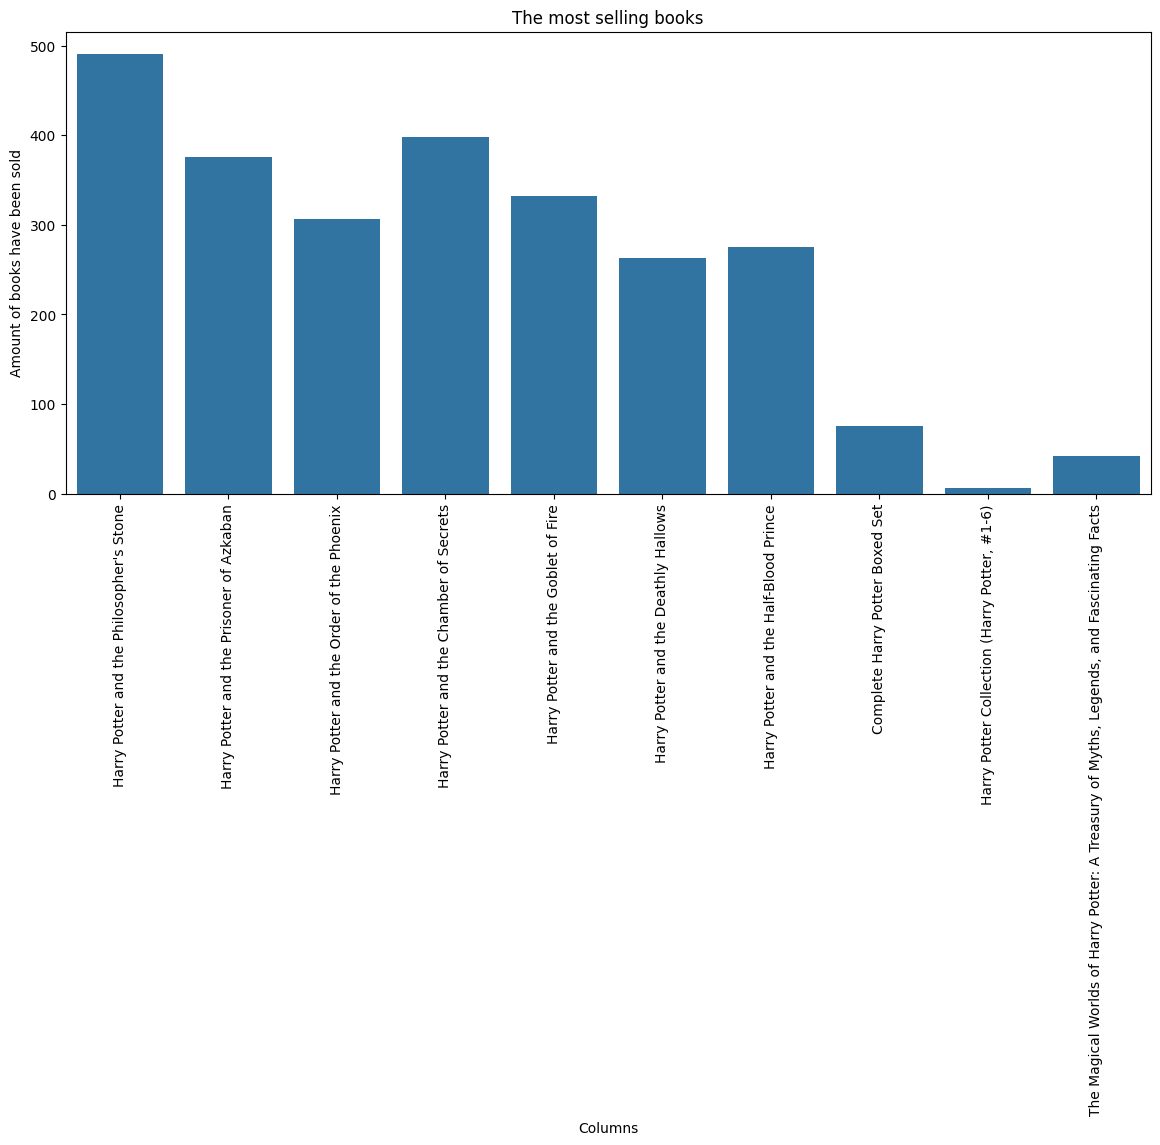

In [411]:

plt.figure(figsize=(14, 6))
sns.barplot(x=harry_potter_books['original_title'], y=harry_potter_books['books_count'])
plt.title("The most selling books")
plt.xlabel("Columns")
plt.ylabel("Amount of books have been sold")
plt.xticks(rotation=90)
plt.show()

In [412]:
ratings_columns = ['ratings_1', 'ratings_2', 'ratings_3', 'ratings_4','ratings_5']


harry_potter_books['Average_Rating'] = harry_potter_books[ratings_columns].mean(axis=1)


harry_potter_books['Average_Rating'].head()

C:\Users\hazem\AppData\Local\Temp\ipykernel_17140\1978471561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  harry_potter_books['Average_Rating'] = harry_potter_books[ratings_columns].mean(axis=1)


1     960013.0
6     393875.0
8     368109.6
9     381239.8
10    373728.4
Name: Average_Rating, dtype: float64

In [413]:
harry_potter_books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,Average_Rating
1,2.0,3.0,3.0,4640799.0,491.0,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4800065.0,75867.0,75504.0,101676.0,455024.0,1156318.0,3011543.0,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,960013.0
6,18.0,5.0,5.0,2402163.0,376.0,043965548X,9.780440e+12,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,Harry Potter and the Prisoner of Azkaban,...,1969375.0,36099.0,6716.0,20413.0,166129.0,509447.0,1266670.0,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...,393875.0
8,21.0,2.0,2.0,2809203.0,307.0,439358078,9.780439e+12,"J.K. Rowling, Mary GrandPré",2003.0,Harry Potter and the Order of the Phoenix,...,1840548.0,28685.0,9528.0,31577.0,180210.0,494427.0,1124806.0,https://images.gr-assets.com/books/1387141547m...,https://images.gr-assets.com/books/1387141547s...,368109.6
9,23.0,15881.0,15881.0,6231171.0,398.0,439064864,9.780439e+12,"J.K. Rowling, Mary GrandPré",1998.0,Harry Potter and the Chamber of Secrets,...,1906199.0,34172.0,8253.0,42251.0,242345.0,548266.0,1065084.0,https://images.gr-assets.com/books/1474169725m...,https://images.gr-assets.com/books/1474169725s...,381239.8
10,24.0,6.0,6.0,3046572.0,332.0,439139600,9.780439e+12,"J.K. Rowling, Mary GrandPré",2000.0,Harry Potter and the Goblet of Fire,...,1868642.0,31084.0,6676.0,20210.0,151785.0,494926.0,1195045.0,https://images.gr-assets.com/books/1361482611m...,https://images.gr-assets.com/books/1361482611s...,373728.4


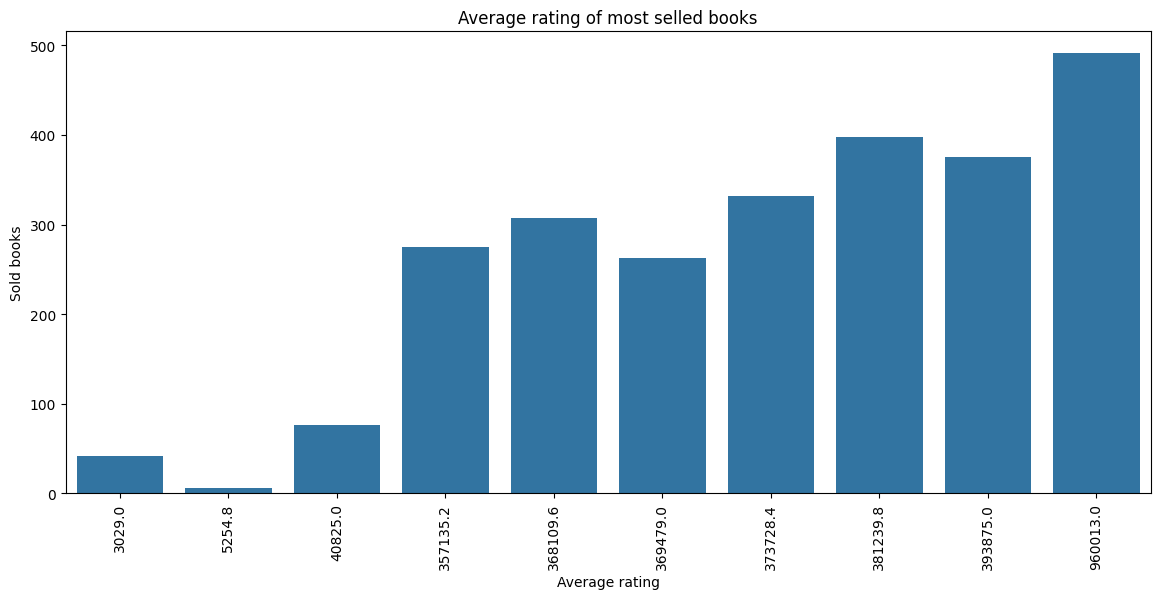

In [414]:

plt.figure(figsize=(14, 6))
sns.barplot(x=harry_potter_books['Average_Rating'], y=harry_potter_books['books_count'])
plt.title("Average rating of most selled books")
plt.xlabel("Average rating")
plt.ylabel("Sold books")
plt.xticks(rotation=90)
plt.show()

In [415]:
ha_num_cols = harry_potter_books.select_dtypes(include=['int64', 'float64']).columns
ha_categorical_cols = harry_potter_books.select_dtypes(include=['object']).columns

In [416]:

correlation_matrix = pd.DataFrame(harry_potter_books[ha_num_cols].corr())

correlation_with_books_count = pd.DataFrame(correlation_matrix['books_count'].sort_values(ascending=False))

print("Correlation with books_count:")
print(correlation_with_books_count)
print(50*'*')

Correlation with books_count:
                           books_count
books_count                   1.000000
ratings_4                     0.936038
ratings_3                     0.908513
Average_Rating                0.906421
work_ratings_count            0.906421
ratings_count                 0.900125
ratings_5                     0.891211
work_text_reviews_count       0.876589
ratings_2                     0.807796
ratings_1                     0.623421
average_rating               -0.037882
work_id                      -0.138068
isbn13                       -0.231655
original_publication_year    -0.374821
goodreads_book_id            -0.596628
best_book_id                 -0.596628
book_id                      -0.721804
**************************************************


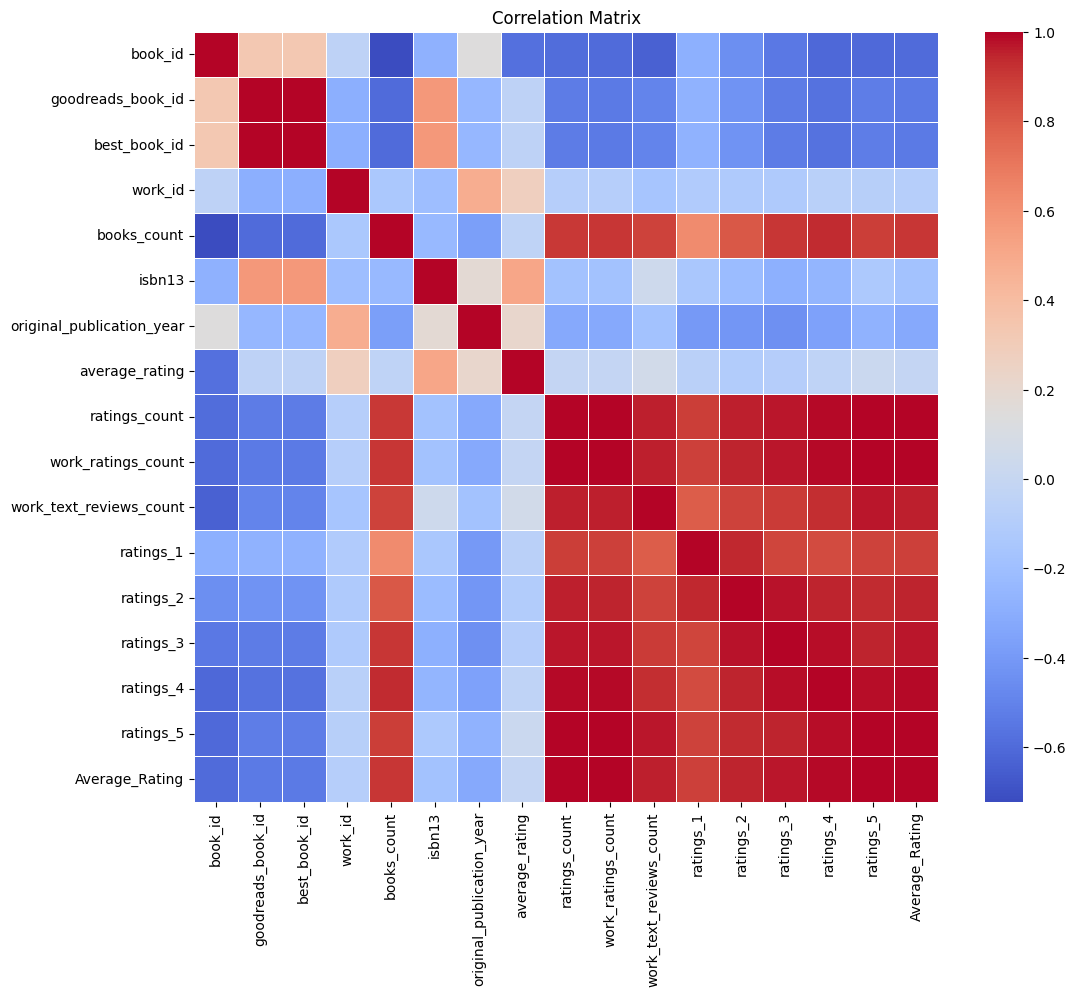

In [417]:

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
